In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm.notebook import tqdm
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm

In [ ]:
RANDOM_SEED = 33
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
data_set = '/content/creditcard.csv'
df = pd.read_csv(data_set)

In [ ]:
print(f"Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")

Dimensões: 284807 linhas × 31 colunas


In [ ]:
print("\TIPOS DE DADOS:")
print(df.dtypes)

\TIPOS DE DADOS:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-2685792817.py:1: SyntaxWarning: invalid escape sequence '\T'
  print("\TIPOS DE DADOS:")


In [ ]:
print("\n PRIMEIRAS 5 LINHAS:")
display(df.head())


 PRIMEIRAS 5 LINHAS:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("\n ESTATÍSTICAS DESCRITIVAS:")
display(df.describe())


 ESTATÍSTICAS DESCRITIVAS:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
initial_len = df.shape[0]
df = df.drop_duplicates()
print(f'Tamanho inicial: {initial_len}, tamanho final {df.shape[0]} | Descartadas {initial_len - df.shape[0]} duplicadas')

Tamanho inicial: 284807, tamanho final 283726 | Descartadas 1081 duplicadas


In [ ]:
initial_len = df.shape[0]
df = df.dropna()
print(f'Tamanho inicial: {initial_len}, tamanho final {df.shape[0]} | Descartados {initial_len - df.shape[0]} registros com valores NA')

Tamanho inicial: 283726, tamanho final 283726 | Descartados 0 registros com valores NA


Divisão dos dados em conjunto de treino, validação e teste

In [ ]:
df_train = df.query('Class == 0').sample(frac=0.6, random_state=RANDOM_SEED)
df_val_test = df.drop(df_train.index)

df_train = df_train.reset_index(drop=True)
df_val_test = df_val_test.reset_index(drop=True)

X_train = df_train.drop('Class', axis='columns')

print(X_train)

            Time        V1        V2        V3        V4        V5        V6  \
0       134127.0  2.093992 -0.021889 -2.078358  0.110514  0.765648 -0.092604   
1         1285.0 -3.835659 -1.955510 -0.404067  0.438873  1.787822 -1.066112   
2        10411.0  0.695586 -1.241033  0.853186  0.338053 -1.173803  0.602339   
3       148412.0 -0.121838 -4.315632 -3.837888  0.416327 -0.905548 -0.907855   
4        32420.0 -2.038530  1.817023  0.100700 -0.781990 -0.998960 -0.631174   
...          ...       ...       ...       ...       ...       ...       ...   
169947  123342.0 -2.484833 -1.539634  0.813091  0.907985  2.358724 -1.502409   
169948   24756.0 -0.346979 -2.103284 -0.685061  1.961605 -0.401125  0.473632   
169949   81880.0 -3.131683 -8.964598 -1.520806  0.778103 -4.604803  0.360734   
169950   92829.0  2.075813  0.013353 -1.253073  0.221448  0.333440 -0.571756   
169951   79848.0 -0.772323  0.306121  2.054812 -0.340253 -0.196040 -0.450821   

              V7        V8        V9  .

In [ ]:
X_val, X_test, classes_val, classes_test = train_test_split(df_val_test.drop('Class', axis='columns'), df_val_test['Class'], test_size=0.65, stratify=df_val_test['Class'], random_state=RANDOM_SEED)

X_val, X_test = X_val.reset_index(drop=True), X_test.reset_index(drop=True)
classes_val, classes_test =  classes_val.reset_index(drop=True), classes_test.reset_index(drop=True)

y_val, y_test = classes_val.apply(lambda c: 0 if c == 0 else 1), classes_test.apply(lambda c: 0 if c == 0 else 1)

In [ ]:
del df_train, df_val_test

In [ ]:
std_scaler = MinMaxScaler()
std_scaler = std_scaler.fit(X_train)

norm_X_train = std_scaler.transform(X_train)
norm_X_val = std_scaler.transform(X_val)
norm_X_test = std_scaler.transform(X_test)

In [ ]:
del X_train, X_val, X_test

In [ ]:
class EarlyStopping:
  def __init__(self, patience=7, delta=0, verbose=True, path='checkpoint.pt'):
      self.patience = patience
      self.delta = delta
      self.verbose = verbose
      self.counter = 0
      self.early_stop = False
      self.val_min_loss = np.inf # Changed from np.Inf to np.inf
      self.path = path

  def __call__(self, val_loss, model):
    if val_loss < self.val_min_loss - self.delta:   # Caso a loss da validação reduza, vamos salvar o modelo e nova loss mínima
      self.save_checkpoint(val_loss, model)
      self.counter = 0
    else:                                           # Caso a loss da validação NÃO reduza, vamos incrementar o contador da paciencia
      self.counter += 1
      print(f'EarlyStopping counter: {self.counter} out of {self.patience}. Current validation loss: {val_loss:.5f}')
      if self.counter >= self.patience:
          self.early_stop = True

  def save_checkpoint(self, val_loss, model):
    if self.verbose:
        print(f'Validation loss decreased ({self.val_min_loss:.5f} --> {val_loss:.5f}).  Saving model ...')
    torch.save(model, self.path)
    self.val_min_loss = val_loss

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self, in_features, dropout_rate=0.1):
    super().__init__()

    self.in_features = in_features
    self.dropout_rate = dropout_rate
    self.early_stopping = None
    self.encoder = nn.Sequential(
      # Camada 1 de encoding:
      nn.Linear(in_features, 30),
      nn.ReLU(),
      # Camada 2 de encoding:
      nn.Linear(30, 8),
      nn.ReLU()
    )

    self.decoder = nn.Sequential(
      # Camada 1 de decoding:
      nn.Linear(8, 30),
      nn.ReLU(),
      # Camada 2 de decoding:
      nn.Linear(30, in_features),
      nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

  def compile(self, learning_rate):
    self.criterion = nn.MSELoss()
    self.optimizer = optim.Adam(self.parameters(), lr = learning_rate)

  def fit(self, X_train, num_epochs, batch_size, X_val = None, patience = None, delta = None):
    if X_val is not None and patience is not None and delta is not None:
      print(f'Using early stopping with patience={patience} and delta={delta}')
      self.early_stopping = EarlyStopping(patience, delta)

    val_avg_losses = []
    train_avg_losses = []

    for epoch in range(num_epochs):
      # Calibrando os pesos do modelo
      train_losses = []
      self.train()
      for batch in tqdm(range(0, len(X_train), batch_size)):
        batch_X = X_train[batch:(batch+batch_size)]
        batch_reconstruction = self.forward(batch_X)

        train_loss = self.criterion(batch_reconstruction, batch_X)
        self.optimizer.zero_grad()
        train_loss.backward()
        self.optimizer.step()
        train_losses.append(train_loss.item())
      train_avg_loss = np.mean(train_losses)
      train_avg_losses.append(train_avg_loss)
      print(f'Epoch#{epoch+1}: Train Average Loss = {train_avg_loss:.5f}')

      # Mecanismo de early stopping
      if self.early_stopping is not None:
        val_losses = []
        self.eval()
        with torch.no_grad():
          for batch in range(0, len(X_val), batch_size):
            batch_X = X_val[batch:(batch+batch_size)]
            batch_reconstruction = self.forward(batch_X)
            val_loss = self.criterion(batch_reconstruction, batch_X)
            val_losses.append(val_loss.item())
        val_avg_loss = np.mean(val_losses)
        val_avg_losses.append(val_avg_loss)
        self.early_stopping(val_avg_loss, self)
        if self.early_stopping.early_stop:
          print(f'Stopped by early stopping at epoch {epoch+1}')
          break

    if self.early_stopping is not None:
      self = torch.load('checkpoint.pt', weights_only=False)
    self.eval()
    return train_avg_losses, val_avg_losses

In [ ]:
BATCH_SIZE = 256
LR = 5e-3
PATIENCE = 2
DELTA = 0.001
NUM_EPOCHS = 3
IN_FEATURES = norm_X_train.shape[1]

In [ ]:
ae_model = Autoencoder(IN_FEATURES)

In [ ]:
ae_model.compile(learning_rate = LR)

In [ ]:
from torchsummary import summary
summary(ae_model, (IN_FEATURES,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]             930
              ReLU-2                   [-1, 30]               0
            Linear-3                    [-1, 8]             248
              ReLU-4                    [-1, 8]               0
            Linear-5                   [-1, 30]             270
              ReLU-6                   [-1, 30]               0
            Linear-7                   [-1, 30]             930
           Sigmoid-8                   [-1, 30]               0
Total params: 2,378
Trainable params: 2,378
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [ ]:
train_avg_losses, _ = ae_model.fit(torch.FloatTensor(norm_X_train), NUM_EPOCHS, BATCH_SIZE)

  0%|          | 0/664 [00:00<?, ?it/s]

Epoch#1: Train Average Loss = 0.00361


  0%|          | 0/664 [00:00<?, ?it/s]

Epoch#2: Train Average Loss = 0.00155


  0%|          | 0/664 [00:00<?, ?it/s]

Epoch#3: Train Average Loss = 0.00129


In [ ]:
not_fraud_norm_X_val = norm_X_val[y_val == 1]
not_fraud_norm_X_val = torch.FloatTensor(not_fraud_norm_X_val)

In [ ]:
NUM_EPOCHS = 10
ae_model_with_es = Autoencoder(IN_FEATURES)
ae_model_with_es.compile(learning_rate = LR)
train_avg_losses, val_avg_losses = ae_model_with_es.fit(torch.FloatTensor(norm_X_train),
                                                NUM_EPOCHS,
                                                BATCH_SIZE,
                                                X_val = not_fraud_norm_X_val,
                                                patience=PATIENCE,
                                                delta=DELTA)

Using early stopping with patience=2 and delta=0.001


  0%|          | 0/664 [00:00<?, ?it/s]

Epoch#1: Train Average Loss = 0.00350
Validation loss decreased (inf --> 0.02928).  Saving model ...


  0%|          | 0/664 [00:00<?, ?it/s]

Epoch#2: Train Average Loss = 0.00184
EarlyStopping counter: 1 out of 2. Current validation loss: 0.03025


  0%|          | 0/664 [00:00<?, ?it/s]

Epoch#3: Train Average Loss = 0.00170
EarlyStopping counter: 2 out of 2. Current validation loss: 0.03060
Stopped by early stopping at epoch 3


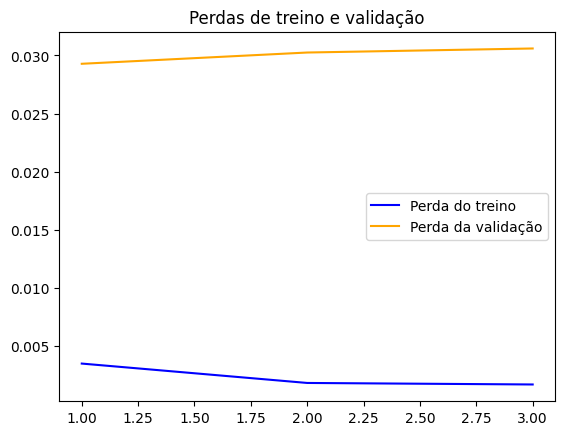

In [ ]:
def plot_train_val_losses(train_avg_losses, val_avg_losses):
  epochs = list(range(1, len(train_avg_losses)+1))
  plt.plot(epochs, train_avg_losses, color='blue', label='Perda do treino')
  plt.plot(epochs, val_avg_losses, color='orange', label='Perda da validação')
  plt.title('Perdas de treino e validação')
  plt.legend()

plot_train_val_losses(train_avg_losses, val_avg_losses)

In [ ]:
def plot_roc_curve(y_true, y_score, max_fpr=1.0):
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  aucroc = roc_auc_score(y_true, y_score)
  plt.plot(100*fpr[fpr < max_fpr], 100*tpr[fpr < max_fpr], label=f'ROC Curve (AUC = {aucroc:.4f})')
  plt.xlim(-2,102)
  plt.xlabel('FPR (%)')
  plt.ylabel('TPR (%)')
  plt.legend()
  plt.title('ROC Curve and AUCROC')

In [ ]:
def get_tpr_per_attack(y_labels, y_pred):
  aux_df = pd.DataFrame({'Label':y_labels,'prediction':y_pred})
  total_per_label = aux_df['Label'].value_counts().to_dict()
  correct_predictions_per_label = aux_df.query('Label != "BENIGN" and prediction == True').groupby('Label').size().to_dict()
  tpr_per_attack = {}
  for attack_label, total in total_per_label.items():
    if attack_label == 'BENIGN':
      continue
    tp = correct_predictions_per_label[attack_label] if attack_label in correct_predictions_per_label else 0
    tpr = tp/total
    tpr_per_attack[attack_label] = tpr
  return tpr_per_attack

In [ ]:
def get_overall_metrics(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  acc = (tp+tn)/(tp+tn+fp+fn)
  tpr = tp/(tp+fn)
  fpr = fp/(fp+tn)
  precision = tp/(tp+fp)
  f1 = (2*tpr*precision)/(tpr+precision)
  return {'acc':acc,'tpr':tpr,'fpr':fpr,'precision':precision,'f1-score':f1}

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  group_counts = [f'{value:.0f}' for value in confusion_matrix(y_true, y_pred).ravel()]
  group_percentages = [f'{value*100:.2f}%' for value in confusion_matrix(y_true, y_pred).ravel()/np.sum(cm)]
  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.array(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, cmap='Oranges', xticklabels=['Predicted Not Fraud', 'Predicted Fraud'], yticklabels=['Actual Not Fraud', 'Actual Fraud'], fmt='')
  return

In [ ]:
def get_autoencoder_anomaly_scores(ae_model, X):
  X = torch.FloatTensor(X)
  reconstructed_X = ae_model(X)
  anomaly_scores = torch.mean(torch.pow(X - reconstructed_X, 2), axis=1).detach().numpy() # MSELoss
  return anomaly_scores

In [ ]:
val_anomaly_scores = get_autoencoder_anomaly_scores(ae_model, norm_X_val)

In [ ]:
print(val_anomaly_scores)

[0.00227229 0.00192447 0.00100336 ... 0.00095651 0.0007597  0.00058087]


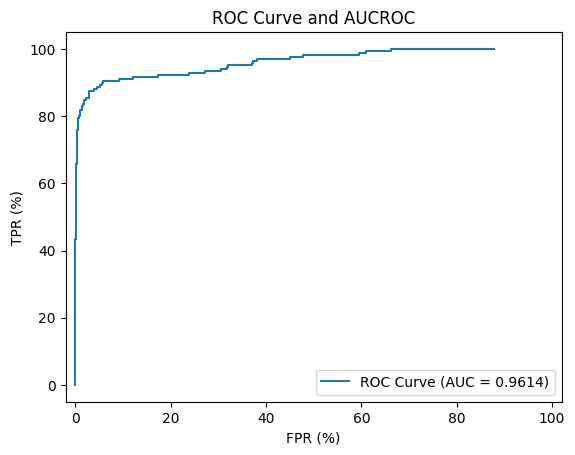

In [ ]:
plot_roc_curve(y_val, val_anomaly_scores)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, val_anomaly_scores)
df_val_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds})
df_val_roc['youden-index'] = df_val_roc['tpr'] - df_val_roc['fpr']
df_val_roc.sort_values('youden-index', ascending=False).drop_duplicates('fpr').query('fpr < 0.03')

,fpr,tpr,thresholds,youden-index
142,0.029278,0.873494,0.003646,0.844216
140,0.029077,0.867470,0.003655,0.838393
136,0.021637,0.855422,0.003947,0.833785
138,0.028547,0.861446,0.003673,0.832899
134,0.018813,0.849398,0.004091,0.830585
...,...,...,...,...
10,0.000252,0.301205,0.029609,0.300953
8,0.000227,0.289157,0.034753,0.288930
6,0.000202,0.259036,0.040115,0.258834
4,0.000177,0.246988,0.043323,0.246811


In [ ]:
best_threshold_row = df_val_roc.loc[df_val_roc['youden-index'].idxmax()]
print(best_threshold_row)
BEST_VALIDATION_THRESHOLD = best_threshold_row['thresholds']

print(f'The best threshold based on Youden index is: {BEST_VALIDATION_THRESHOLD:.4f}')

fpr             0.057321
tpr             0.903614
thresholds      0.003008
youden-index    0.846294
Name: 154, dtype: float64
The best threshold based on Youden index is: 0.0030


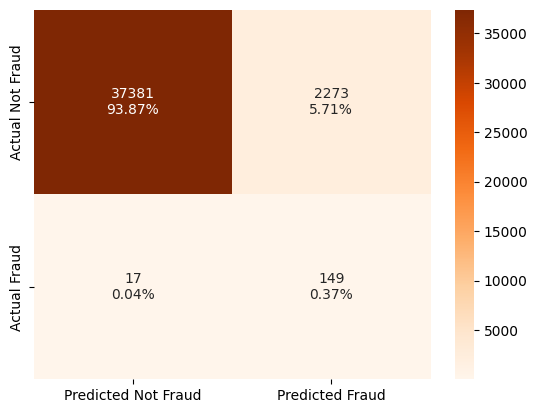

In [ ]:
plot_confusion_matrix(y_val, val_anomaly_scores > BEST_VALIDATION_THRESHOLD)

In [ ]:
get_overall_metrics(y_val, val_anomaly_scores > BEST_VALIDATION_THRESHOLD)

{'acc': np.float64(0.9424912104470116),
 'tpr': np.float64(0.8975903614457831),
 'fpr': np.float64(0.057320825137438844),
 'precision': np.float64(0.06151940545004129),
 'f1-score': np.float64(0.1151468315301391)}